In [37]:
# For Data Manipulation
import pandas as pd
import numpy as np

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Statistical Analysis
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!ls '/content/drive/MyDrive/Datasets/'

In [ ]:
nasa = pd.read_csv('/content/drive/MyDrive/Datasets/Global_Space_Exploration_Dataset.csv')
nasa.head()

In [38]:

nasa = pd.read_csv(r"C:\Users\Aman Shah\Desktop\MEGA PROJECT\NASA\Global_Space_Exploration_Dataset.csv")
nasa.head()

,Country,Year,Mission Name,Mission Type,Launch Site,Satellite Type,Budget (in Billion $),Success Rate (%),Technology Used,Environmental Impact,Collaborating Countries,Duration (in Days)
0,China,2008,Sharable tertiary superstructure,Manned,Sheilatown,Communication,16.20,90,Nuclear Propulsion,Medium,"France, UK, Russia",112
1,Japan,2018,Re-engineered composite flexibility,Manned,New Ericfurt,Communication,29.04,99,Solar Propulsion,High,"Germany, Israel",236
2,Israel,2013,Reactive disintermediate projection,Manned,Port Kaitlynstad,Communication,28.73,54,AI Navigation,Medium,"China, Israel, USA",238
3,UAE,2010,Grass-roots 6thgeneration implementation,Unmanned,Mariastad,Spy,37.27,58,Traditional Rocket,Low,USA,186
4,India,2006,Balanced discrete orchestration,Manned,North Jasonborough,Weather,18.95,91,Solar Propulsion,Medium,"Israel, China, India",277


In [39]:
nasa.duplicated().sum()

np.int64(0)

In [40]:
print("Checking Null Values: " , nasa.isna().sum().sum())
print("Checking Null Values Column Wise")
nasa.isna().sum()

Checking Null Values:  0
Checking Null Values Column Wise


Country                    0
Year                       0
Mission Name               0
Mission Type               0
Launch Site                0
Satellite Type             0
Budget (in Billion $)      0
Success Rate (%)           0
Technology Used            0
Environmental Impact       0
Collaborating Countries    0
Duration (in Days)         0
dtype: int64

In [41]:
nasa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  3000 non-null   object 
 1   Year                     3000 non-null   int64  
 2   Mission Name             3000 non-null   object 
 3   Mission Type             3000 non-null   object 
 4   Launch Site              3000 non-null   object 
 5   Satellite Type           3000 non-null   object 
 6   Budget (in Billion $)    3000 non-null   float64
 7   Success Rate (%)         3000 non-null   int64  
 8   Technology Used          3000 non-null   object 
 9   Environmental Impact     3000 non-null   object 
 10  Collaborating Countries  3000 non-null   object 
 11  Duration (in Days)       3000 non-null   int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 281.4+ KB


In [42]:
nasa["Year"] = nasa["Year"].astype(int)
nasa.head().dtypes

Country                     object
Year                         int64
Mission Name                object
Mission Type                object
Launch Site                 object
Satellite Type              object
Budget (in Billion $)      float64
Success Rate (%)             int64
Technology Used             object
Environmental Impact        object
Collaborating Countries     object
Duration (in Days)           int64
dtype: object

***We Were Going to Conduct the Descriptive Analysis***

In [43]:
nasa.describe()

,Year,Budget (in Billion $),Success Rate (%),Duration (in Days)
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2012.471000,25.428917,74.985000,181.483000
std,7.437177,14.108438,14.945252,104.983822
min,2000.000000,0.530000,50.000000,1.000000
25%,2006.000000,12.977500,62.000000,91.000000
50%,2012.000000,25.495000,75.000000,180.000000
75%,2019.000000,37.597500,88.000000,272.000000
max,2025.000000,49.970000,100.000000,365.000000


In [44]:
# Variance of Budget
print("Variance of Budget: " , nasa["Budget (in Billion $)"].var())
print("Variance of Success Rate: " , nasa["Success Rate (%)"].var())
print("Variance of Duration: " , nasa["Duration (in Days)"].var())

Variance of Budget:  199.04802493470046
Variance of Success Rate:  223.3605618539513
Variance of Duration:  11021.602911970658


In [45]:
year_range = nasa["Year"].max() - nasa["Year"].min()
print("Range of Years: ", year_range)

Range of Years:  25


In [46]:
budget_range = nasa["Budget (in Billion $)"].max() - nasa["Budget (in Billion $)"].min()
print("Range of Budget: ", budget_range)

Range of Budget:  49.44


In [47]:
range_success = nasa["Success Rate (%)"].max() - nasa["Success Rate (%)"].min()
print("Range of Success Rate: ", range_success)

Range of Success Rate:  50


In [48]:
range_duration = nasa["Duration (in Days)"].max() - nasa["Duration (in Days)"].min()
print("Range of Duration: ", range_duration)

Range of Duration:  364


***Detecting the Outliers***

In [49]:
def detect_outliers(df , features):
  outlier_summary = {}

  for feature in features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = df[(df[feature] < lower_limit) | (df[feature] > upper_limit)]
    outlier_summary[feature] = outliers.shape[0]

  return outlier_summary

In [50]:
detect_outliers(nasa , ["Budget (in Billion $)" , "Success Rate (%)" , "Duration (in Days)"])

{'Budget (in Billion $)': 0, 'Success Rate (%)': 0, 'Duration (in Days)': 0}

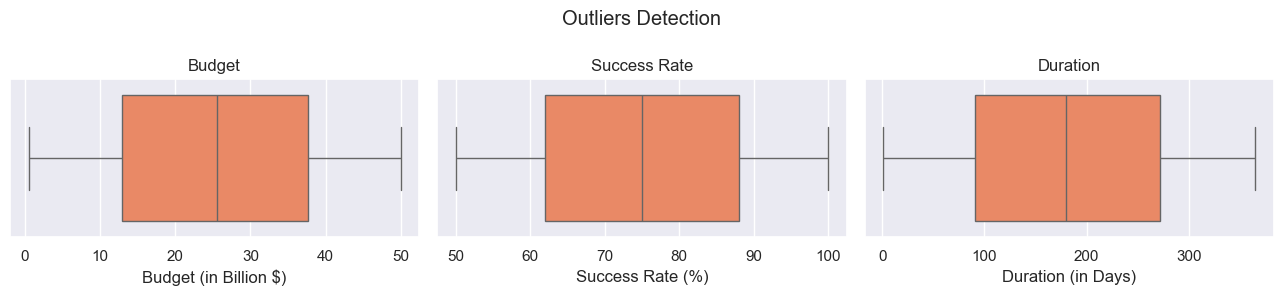

In [51]:
sns.set_theme(style="darkgrid")

fig , ax = plt.subplots(1,3 , figsize = (13,3))

sns.boxplot(x = nasa["Budget (in Billion $)"] , color = "coral" , ax=ax[0])
ax[0].set_title("Budget")

sns.boxplot(x = nasa["Success Rate (%)"], color = "coral" , ax=ax[1])
ax[1].set_title("Success Rate")

sns.boxplot(x = nasa["Duration (in Days)"], color = "coral" , ax=ax[2])
ax[2].set_title("Duration")

plt.suptitle("Outliers Detection")
plt.tight_layout()
plt.show()

# ***Histogram For Distribution***

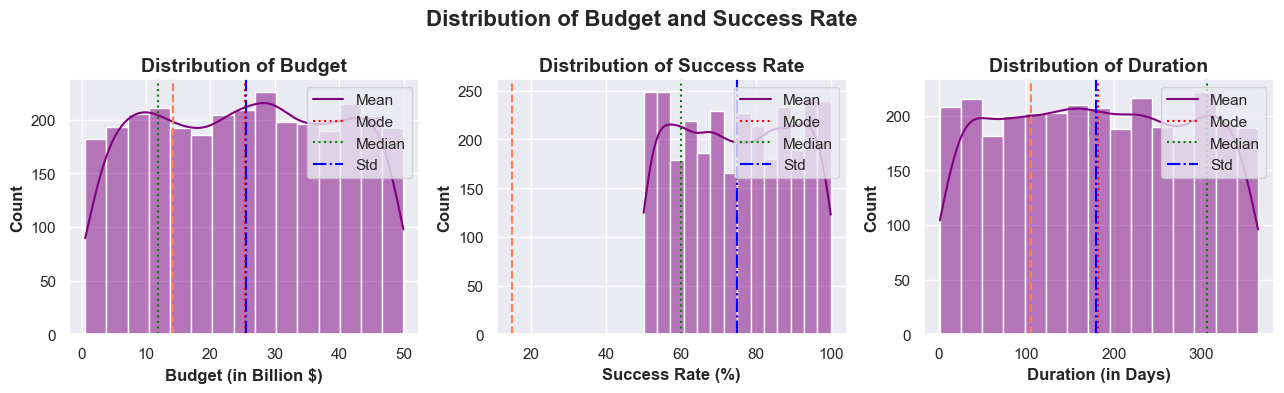

In [52]:
fig , ax = plt.subplots(1 , 3 , figsize=(13,4))
ax = ax.flatten()

mean_bud = nasa["Budget (in Billion $)"].mean()
mode_bud = nasa["Budget (in Billion $)"].mode()[0]
median_bud = nasa["Budget (in Billion $)"].median()
std_bud = nasa["Budget (in Billion $)"].std()

sns.histplot(nasa["Budget (in Billion $)"] ,color = "purple" , kde=True , ax=ax[0])
ax[0].axvline(mean_bud , color="red" , linestyle="dotted")
ax[0].axvline(mode_bud , color="green" , linestyle=":")
ax[0].axvline(median_bud , color="blue" , linestyle="-.")
ax[0].axvline(std_bud , color="coral" , linestyle="--")
ax[0].set_xlabel("Budget (in Billion $)" , fontsize = 12 , fontweight="bold")
ax[0].set_ylabel("Count" , fontsize = 12 , fontweight="bold")
ax[0].set_title("Distribution of Budget", fontsize = 14 , fontweight="bold")
ax[0].legend(["Mean" , "Mode" , "Median" , "Std"] , loc = "upper right")


mean_suc = nasa["Success Rate (%)"].mean()
mode_suc = nasa["Success Rate (%)"].mode()[0]
median_suc = nasa["Success Rate (%)"].median()
std_suc = nasa["Success Rate (%)"].std()

sns.histplot(nasa["Success Rate (%)"],color = "purple" , kde=True , ax=ax[1])
ax[1].axvline(mean_suc , color="red" , linestyle="dotted")
ax[1].axvline(mode_suc , color="green" , linestyle=":")
ax[1].axvline(median_suc , color="blue" , linestyle="-.")
ax[1].axvline(std_suc , color="coral" , linestyle="--")
ax[1].set_xlabel("Success Rate (%)" , fontsize = 12 , fontweight="bold")
ax[1].set_ylabel("Count" , fontsize = 12 , fontweight="bold")
ax[1].set_title("Distribution of Success Rate", fontsize = 14 , fontweight="bold")
ax[1].legend(["Mean" , "Mode" , "Median" , "Std"], loc = "upper right")

mean_dur = nasa["Duration (in Days)"].mean()
mode_dur = nasa["Duration (in Days)"].mode()[0]
median_dur = nasa["Duration (in Days)"].median()
std_dur = nasa["Duration (in Days)"].std()

sns.histplot(nasa["Duration (in Days)"],color = "purple" , kde=True , ax=ax[2])
ax[2].axvline(mean_dur , color="red" , linestyle="dotted")
ax[2].axvline(mode_dur , color="green" , linestyle=":")
ax[2].axvline(median_dur , color="blue" , linestyle="-.")
ax[2].axvline(std_dur , color="coral" , linestyle="--")
ax[2].set_xlabel("Duration (in Days)" , fontsize = 12 , fontweight="bold")
ax[2].set_ylabel("Count" , fontsize = 12 , fontweight="bold")
ax[2].set_title("Distribution of Duration", fontsize = 14 , fontweight="bold")
ax[2].legend(["Mean" , "Mode" , "Median" , "Std"], loc = "upper right")


plt.suptitle("Distribution of Budget and Success Rate" , fontsize = 16 , fontweight="bold")
plt.tight_layout()
plt.show()

***Now We Were Going to Conduct the Inferential Statistics***

In [53]:
nasa.head(1)

,Country,Year,Mission Name,Mission Type,Launch Site,Satellite Type,Budget (in Billion $),Success Rate (%),Technology Used,Environmental Impact,Collaborating Countries,Duration (in Days)
0,China,2008,Sharable tertiary superstructure,Manned,Sheilatown,Communication,16.2,90,Nuclear Propulsion,Medium,"France, UK, Russia",112


In [54]:
total_typ = nasa["Mission Type"]
fav_typ = nasa[ nasa['Mission Type'] == "Manned" ]

P_manned = len(fav_typ) / len(total_typ)
print("P(Manned) = " , P_manned)


P(Manned) =  0.5093333333333333


In [55]:
total_suc = nasa["Success Rate (%)"]
fav_suc = nasa[ nasa['Success Rate (%)'] > 80 ]

P_success = len(fav_suc) / len(total_suc)
print("P(Success > 80%) = " , P_success)

P(Success > 80%) =  0.40166666666666667


In [56]:
total_bud = nasa['Budget (in Billion $)']
fav_bud = nasa[ nasa['Budget (in Billion $)'] > 20 ]

P_budget = len(fav_bud) / len(total_bud)
print("P(Budget > 20) = " , P_budget)

P(Budget > 20) =  0.616


In [57]:
total_env = nasa["Environmental Impact"]
fav_env = nasa[ nasa['Environmental Impact'] > "High" ]

P_High_env = len(fav_env) / len(total_env)
print("P(Environmental High Impact) = " , P_High_env)

P(Environmental High Impact) =  0.6806666666666666


In [58]:
mean_type = (nasa['Mission Type'] == "Manned").mean()
print("P(Manned)" , mean_type)

mean_succ = (nasa['Success Rate (%)'] > 80).mean()
print("P(Success > 80%)" , mean_suc)

mean_budg = (nasa['Budget (in Billion $)'] > 20).mean()
print("P(Budget > 20)" , mean_bud)

mean_env = (nasa['Environmental Impact'] > "High").mean()
print("P(Environment High Impact)" , mean_env)

P(Manned) 0.5093333333333333
P(Success > 80%) 74.985
P(Budget > 20) 25.428916666666666
P(Environment High Impact) 0.6806666666666666


***Differnce between Mean and Probablity both Are Equal***

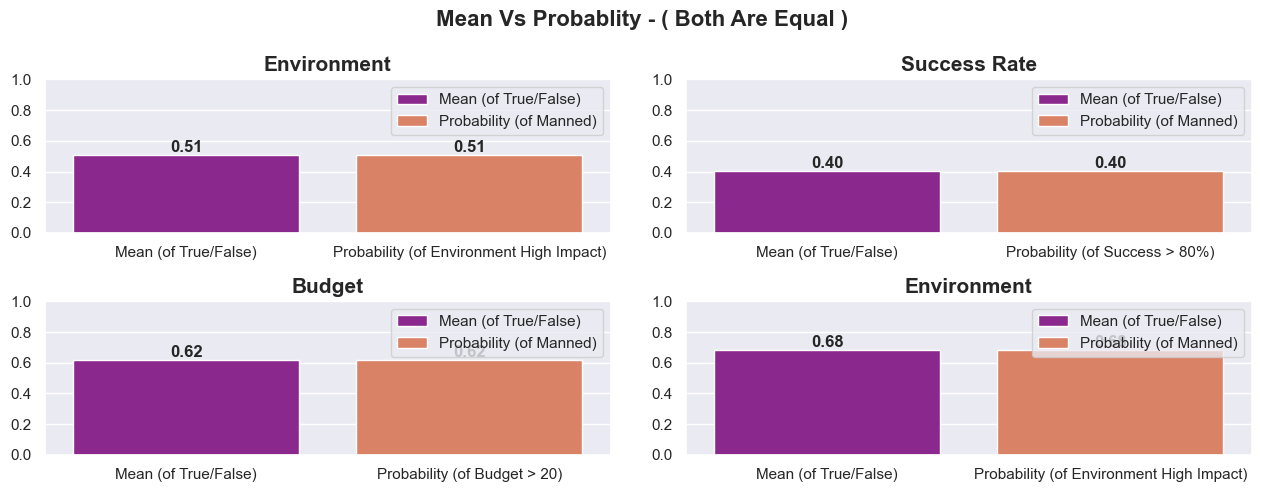

In [59]:
fig , ax = plt.subplots(2,2 , figsize=(13, 5))
ax = ax.flatten()

sns.barplot(
    x=["Mean (of True/False)", "Probability (of Environment High Impact)"],
    y=[mean_type, P_manned],
    ax=ax[0],
    hue = ["Mean (of True/False)", "Probability (of Manned)"],
    hue_order = ["Mean (of True/False)", "Probability (of Manned)"],
    palette="plasma",
)
ax[0].set_title("Environment", fontsize = 15 , fontweight="bold")
ax[0].set_ylim(0, 1)
ax[0].legend(loc = 'upper right')

for i, val in enumerate([mean_type, P_manned]):
    ax[0].text(i, val + 0.02, f"{val:.2f}", ha='center', fontweight='bold')

sns.barplot(
    x=["Mean (of True/False)", "Probability (of Success > 80%)"],
    y=[mean_succ, P_success],
    ax=ax[1],
    hue = ["Mean (of True/False)", "Probability (of Manned)"],
    hue_order = ["Mean (of True/False)", "Probability (of Manned)"],
    palette="plasma",
)
ax[1].set_title("Success Rate", fontsize = 15 , fontweight="bold")
ax[1].set_ylim(0, 1)
ax[1].legend(loc = 'upper right')

for i , val in enumerate([mean_succ, P_success]):
    ax[1].text(i, val + 0.02, f"{val:.2f}", ha='center', fontweight='bold')

sns.barplot(
    x=["Mean (of True/False)", "Probability (of Budget > 20)"],
    y=[mean_budg, P_budget],
    ax=ax[2],
    hue = ["Mean (of True/False)", "Probability (of Manned)"],
    hue_order = ["Mean (of True/False)", "Probability (of Manned)"],
    palette="plasma",
)
ax[2].set_title("Budget", fontsize = 15 , fontweight="bold")
ax[2].set_ylim(0, 1)
ax[2].legend(loc = 'upper right')

for i , val in enumerate([mean_budg , P_budget]):
    ax[2].text(i, val + 0.02, f"{val:.2f}", ha='center', fontweight='bold')

sns.barplot(
    x=["Mean (of True/False)", "Probability (of Environment High Impact)"],
    y=[mean_env, P_High_env],
    ax=ax[3],
    hue = ["Mean (of True/False)", "Probability (of Manned)"],
    hue_order = ["Mean (of True/False)", "Probability (of Manned)"],
    palette="plasma",
)
ax[3].set_title("Environment", fontsize = 15 , fontweight="bold")
ax[3].set_ylim(0, 1)
ax[3].legend(loc = 'upper right')

for i , val in enumerate([mean_env , P_High_env]):
    ax[3].text(i, val + 0.02, f"{val:.2f}", ha='center', fontweight='bold')

plt.suptitle("Mean Vs Probablity - ( Both Are Equal )", fontsize = 16 , fontweight="bold")
plt.tight_layout()
plt.show()

***Empirical Probablity***

In [60]:
nasa["Technology Used"].value_counts()

Technology Used
Traditional Rocket    650
AI Navigation         609
Solar Propulsion      598
Reusable Rocket       581
Nuclear Propulsion    562
Name: count, dtype: int64

# **Empirical Rule by Complete Logic of Inferential Statistics**

In [61]:
import random
total_tech = nasa["Technology Used"]
count_tect = 0

for tech in total_tech:
  tech_select = random.choice(list(nasa["Technology Used"]))
  if tech == "AI Navigation":
    count_tect += 1

print("P(AI Navigation) = " , count_tect / len(total_tech))


P(AI Navigation) =  0.203


In [62]:
nasa["Country"].value_counts()

Country
China      322
UK         322
Israel     313
France     311
UAE        305
USA        304
India      294
Japan      290
Russia     289
Germany    250
Name: count, dtype: int64

# **Conditional Probablity by Complete Logic of Inferential Statistics**

In [63]:
total_mission = nasa[ nasa["Country"] == "USA"]
usa_manned = nasa[ (nasa["Country"] == "USA") & (nasa["Mission Type"] =="Manned")]

P_USA_Manned = len(usa_manned) / len(total_mission)
print("P(Mannes | USA) = " , P_USA_Manned)


P(Mannes | USA) =  0.5460526315789473


# **Conditional Probablity by using Mean (of True False)**

In [64]:
P_Manned_given_USA = (nasa[nasa["Country"] == "USA"]["Mission Type"] == "Manned").mean()
print("P(Manned | USA) =", P_Manned_given_USA)

P(Manned | USA) = 0.5460526315789473


# **Addition Rule By Complete Logic of Inferential Statistics**

In [65]:
total_type = nasa["Mission Type"]
fav_type = nasa[ nasa['Mission Type'] == "Manned" ]

P_manned = len(fav_type) / len(total_type)
print("P(Manned) = " , P_manned)

total_env = nasa["Environmental Impact"]
fav_env = nasa[ nasa['Environmental Impact'] > "High" ]

P_High_env = len(fav_env) / len(total_env)
print("P(Environmental High Impact) = " , P_High_env)

P_manned_or_high = P_manned + P_High_env - (P_manned * P_High_env)
print("P(Manned or High) = " , P_manned_or_high)

P(Manned) =  0.5093333333333333
P(Environmental High Impact) =  0.6806666666666666
P(Manned or High) =  0.8433137777777777


# ***Addition Rule by using Mean (of True/Fales)***

In [66]:
P_manned = (nasa['Mission Type'] == "Manned").mean()
P_high_env = (nasa['Environmental Impact'] > "High").mean()

P_manned_or_high = P_manned + P_high_env - (P_manned * P_high_env)
print("P(Manned or High) =", P_manned_or_high)

P(Manned or High) = 0.8433137777777777


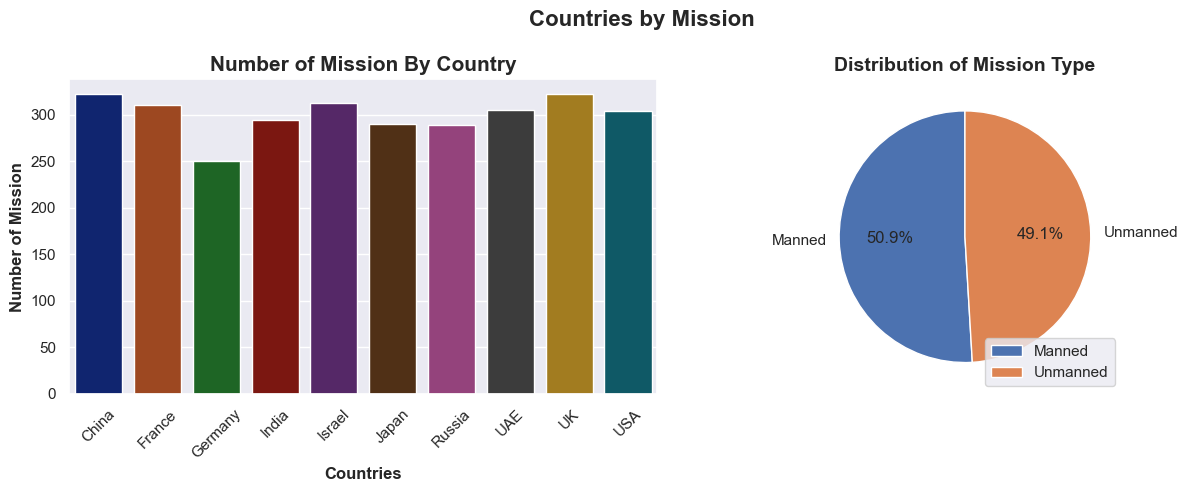

In [67]:
# Number of Mission by Country

mission_by_country = nasa.groupby("Country")["Mission Type"].count()
mission_by_country

fig , ax = plt.subplots(1,2 , figsize=(13, 5))
ax = ax.flatten()

sns.barplot(
    x = mission_by_country.index ,
    y = mission_by_country.values,
    hue = mission_by_country.index,
    palette = "dark",
    ax = ax[0]
    )
ax[0].set_title("Number of Mission By Country", fontsize = 15 , fontweight="bold")
ax[0].set_ylabel("Number of Mission", fontsize = 12 , fontweight="bold")
ax[0].set_xlabel("Countries" , fontsize = 12 , fontweight="bold")
ax[0].tick_params(axis='x', rotation=45)


mission_counts = nasa["Mission Type"].value_counts()

ax[1].pie(
    mission_counts.values,           # numeric values
    labels=mission_counts.index,     # category names
    autopct='%1.1f%%',               # show percentage
    startangle=90                    # rotate start angle for better look
)
ax[1].set_title("Distribution of Mission Type", fontsize = 14 , fontweight="bold")
ax[1].legend(loc = 'lower right')

plt.suptitle("Countries by Mission", fontsize = 16 , fontweight="bold")
plt.tight_layout()
plt.show()

# ***Budget vs Success Rate***

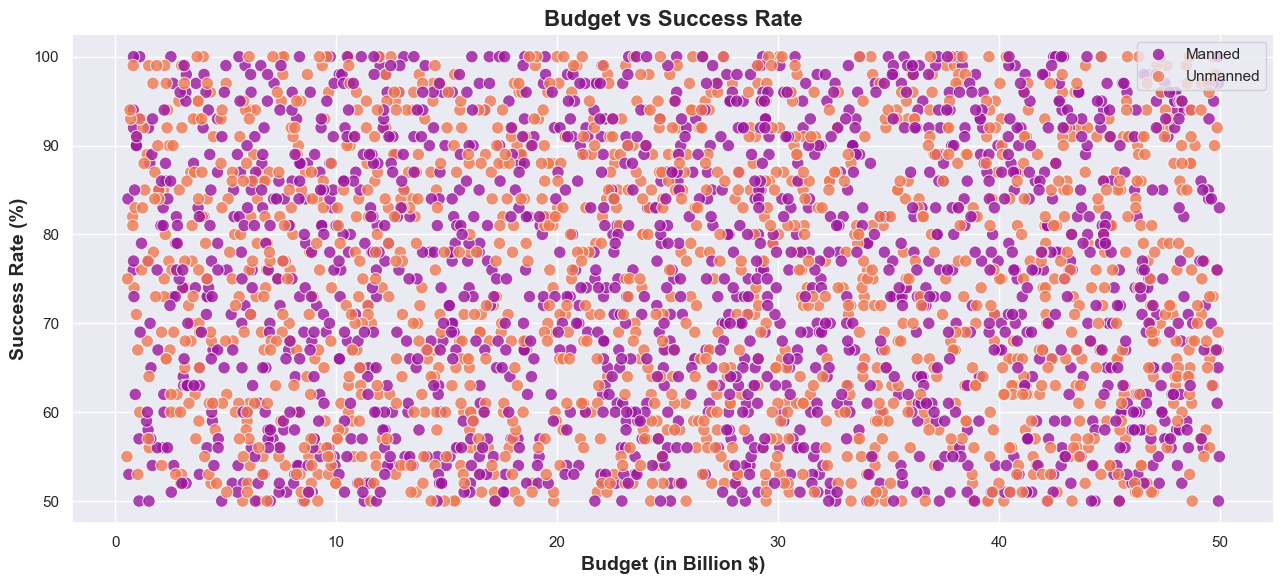

In [68]:
plt.figure(figsize=(13, 6))

sns.scatterplot(
    data=nasa,
    x="Budget (in Billion $)",
    y="Success Rate (%)",
    hue="Mission Type",
    palette="plasma",
    s=80,            # marker size
    edgecolor='w',   # white border for clarity
    alpha=0.8        # transparency for overlap
)

plt.title("Budget vs Success Rate", fontsize=16, fontweight='bold')
plt.xlabel("Budget (in Billion $)", fontsize = 14 , fontweight="bold")
plt.ylabel("Success Rate (%)", fontsize = 14 , fontweight="bold")
plt.legend(loc = 'upper right')

plt.tight_layout()
plt.show()


# ***Succes Rate by Countries vs Succes Rate by Technology***

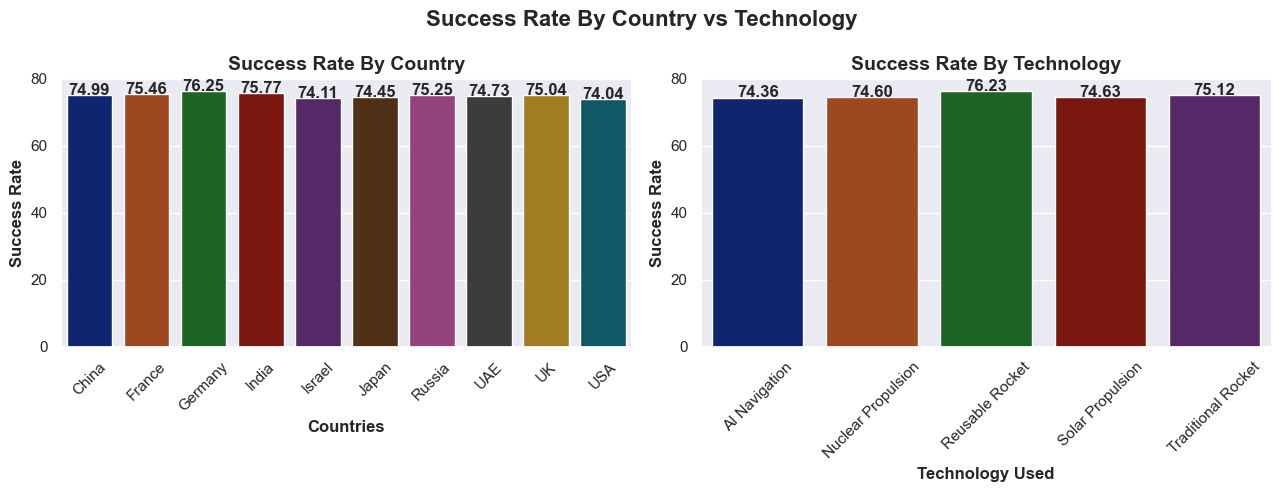

In [75]:
fig , ax = plt.subplots(1,2 , figsize=(13, 5))
ax = ax.flatten()

success_rate_by_country = nasa.groupby("Country")["Success Rate (%)"].mean()

sns.barplot(
    x = success_rate_by_country.index ,
    y = success_rate_by_country.values,
    hue = success_rate_by_country.index,
    palette = "dark",
    ax = ax[0]
)
ax[0].set_title("Success Rate By Country", fontsize = 14 , fontweight="bold")
ax[0].set_ylabel("Success Rate", fontsize = 12 , fontweight="bold")
ax[0].set_xlabel("Countries" , fontsize = 12 , fontweight="bold")
ax[0].tick_params(axis='x', rotation=45)
for i , val in enumerate(success_rate_by_country.values):
    ax[0].text(i, val + 0.02, f"{val:.2f}", ha='center', fontweight='bold')


success_rate_by_technology = nasa.groupby("Technology Used")["Success Rate (%)"].mean()

sns.barplot(
    x = success_rate_by_technology.index ,
    y = success_rate_by_technology.values,
    hue = success_rate_by_technology.index,
    palette = "dark",
    ax = ax[1]
)
ax[1].set_title("Success Rate By Technology", fontsize = 14 , fontweight="bold")
ax[1].set_ylabel("Success Rate", fontsize = 12 , fontweight="bold")
ax[1].set_xlabel("Technology Used" , fontsize = 12 , fontweight="bold")
ax[1].tick_params(axis='x', rotation=45)
for i , val in enumerate(success_rate_by_technology.values):
    ax[1].text(i, val + 0.02, f"{val:.2f}", ha='center', fontweight='bold')

plt.suptitle("Success Rate By Country vs Technology", fontsize = 16 , fontweight="bold")
plt.tight_layout()
plt.show()

# ***Success Rate by Higher Budget***

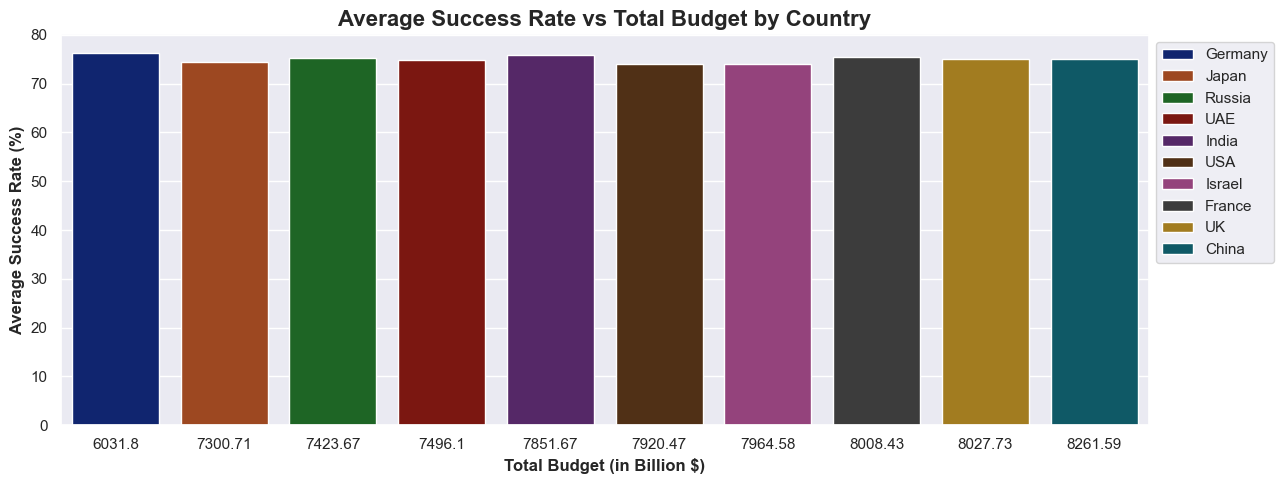

In [70]:
country_summary = (
    nasa.groupby("Country")
    .agg({
        "Success Rate (%)": "mean",           # average success rate
        "Budget (in Billion $)": "sum"        # total budget spent
    })
    .reset_index()
)

plt.figure(figsize=(13,5))
sns.barplot(
    data=country_summary,
    x="Budget (in Billion $)",
    y="Success Rate (%)",
    hue="Country",
    palette="dark"
)

plt.title("Average Success Rate vs Total Budget by Country", fontsize = 16 , fontweight="bold")
plt.xlabel("Total Budget (in Billion $)", fontsize = 12 , fontweight="bold")
plt.ylabel("Average Success Rate (%)", fontsize = 12 , fontweight="bold")
plt.legend(bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()


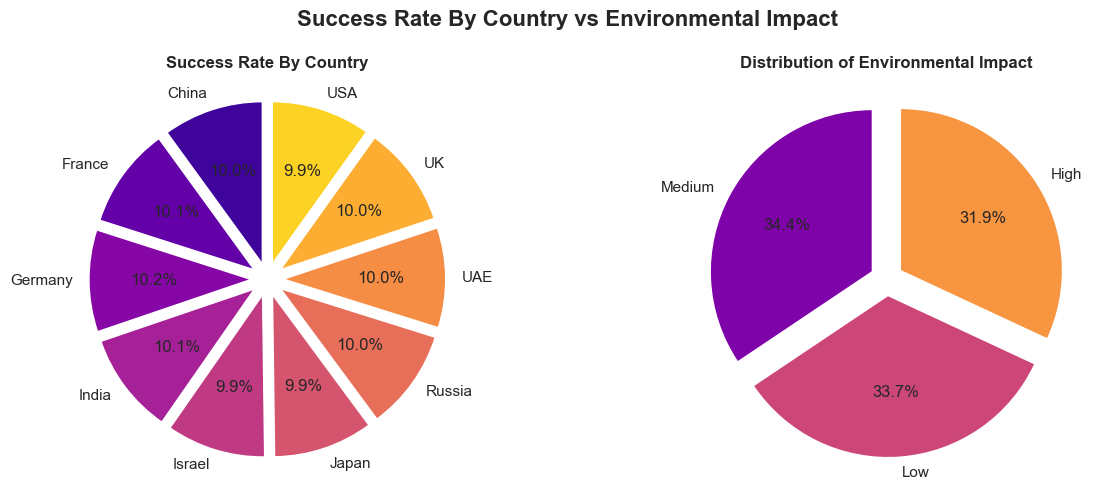

In [71]:
fig , ax = plt.subplots(1,2 , figsize=(13, 5))
ax = ax.flatten()

ax[0].pie(
    country_summary["Success Rate (%)"],
    labels=country_summary["Country"],
    autopct='%1.1f%%',
    startangle=90,
    explode=[0.1] * len(country_summary),
    colors=sns.color_palette("plasma", len(country_summary))
)
ax[0].set_title("Success Rate By Country", fontsize = 12 , fontweight="bold")


impact_counts = nasa["Environmental Impact"].value_counts()

ax[1].pie(
    impact_counts.values,           # numeric counts
    labels=impact_counts.index,     # category labels
    autopct='%1.1f%%',              # show percentages
    startangle=90,
    explode = [0.1] * len(impact_counts),
    colors=sns.color_palette("plasma", len(impact_counts))
)

ax[1].set_title("Distribution of Environmental Impact", fontsize = 12 , fontweight="bold")

plt.suptitle("Success Rate By Country vs Environmental Impact", fontsize = 16 , fontweight="bold")
plt.tight_layout()
plt.show()

# ***Collaborations Affects Mission Success***

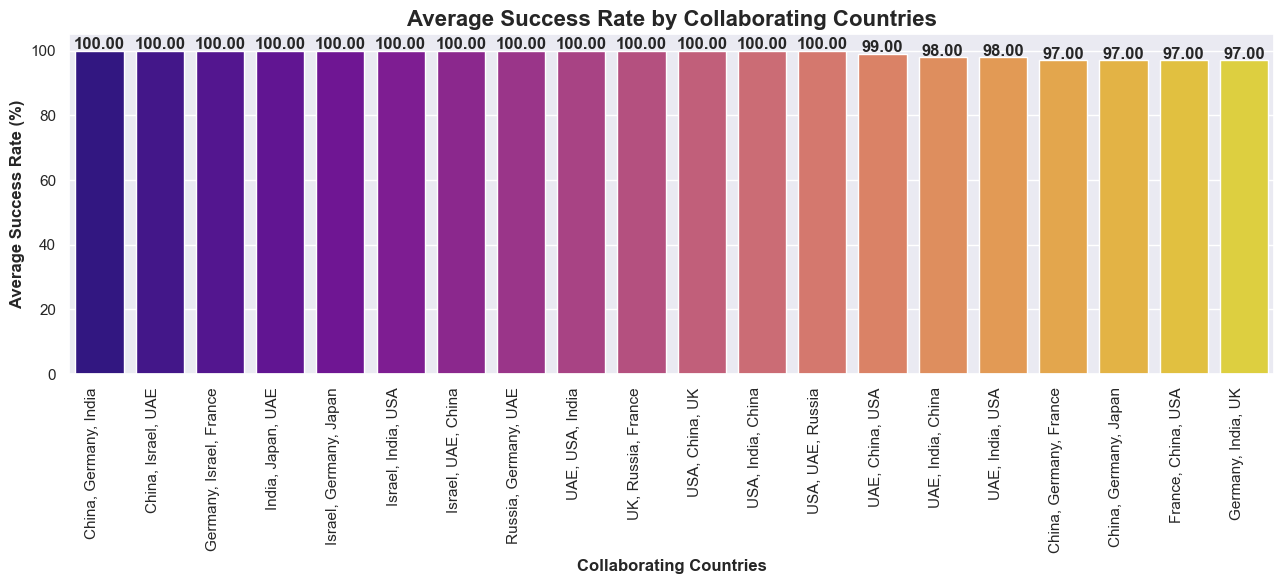

In [72]:
collaboration = (
    nasa.groupby("Collaborating Countries")["Success Rate (%)"]
    .mean()
    .nlargest(20)
    .reset_index()
)

plt.figure(figsize=(13,6))
sns.barplot(
    data=collaboration,
    x="Collaborating Countries",
    y="Success Rate (%)",
    hue = "Collaborating Countries",
    palette="plasma"
)

plt.title("Average Success Rate by Collaborating Countries", fontsize = 16 , fontweight="bold")
plt.xlabel("Collaborating Countries", fontsize = 12 , fontweight="bold")
plt.ylabel("Average Success Rate (%)", fontsize = 12 , fontweight="bold")
plt.xticks(rotation=90, ha='right')  # rotate for better readability

for i, val in enumerate(collaboration["Success Rate (%)"]):
    plt.text(i, val + 0.5, f"{val:.2f}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

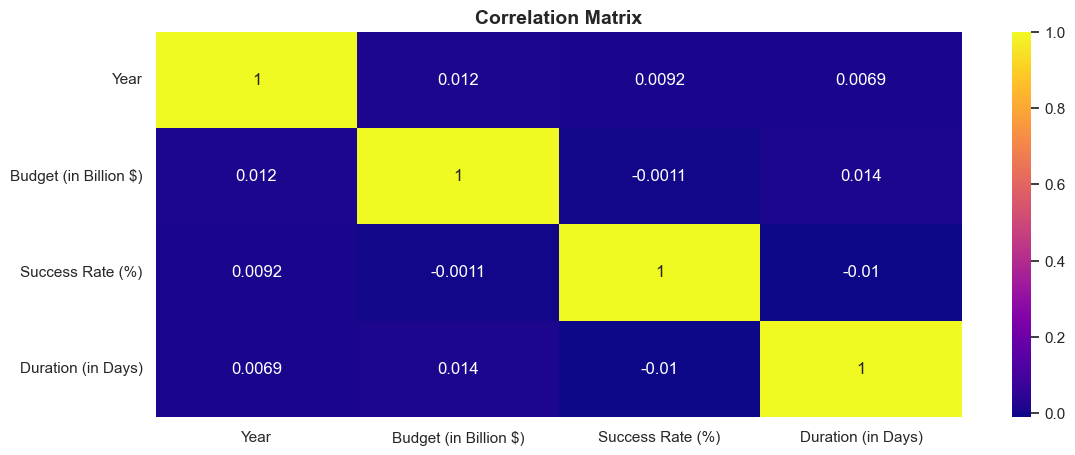

In [74]:
plt.figure(figsize=(13,5))
sns.heatmap(nasa.corr(numeric_only=True), annot=True, cmap='plasma')
plt.title("Correlation Matrix", fontsize=14, fontweight='bold')
plt.show()